In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [114]:
df = pd.read_excel (r'C:\Users\VENKATESH\Desktop\Projects 1\Agriculture.xlsx')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [115]:
df.info

<bound method DataFrame.info of              ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0     F00000001                      188          1          0   
1     F00000003                      209          1          0   
2     F00000004                      257          1          0   
3     F00000005                      257          1          1   
4     F00000006                      342          1          0   
...         ...                      ...        ...        ...   
4594  F00008078                     2138          0          1   
4595  F00008079                     2139          0          1   
4596  F00008080                     2267          0          1   
4597  F00008082                     2267          0          1   
4598  F00008083                     2267          0          1   

      Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                          1                  0                0.0   
1                          1       

In [116]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [117]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [118]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [119]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna((df['Number_Weeks_Used'].mean()))

In [120]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [121]:
df.shape

(4599, 10)

In [122]:
#Check if there are any null values in dataset
df.isnull().values.any()

False

In [123]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_Insects_Count,4599.0,1363.000435,814.439120,150.0,731.0,1212.000000,1786.0,4097.0
Crop_Type,4599.0,0.224831,0.417517,0.0,0.0,0.000000,0.0,1.0
Soil_Type,4599.0,0.476625,0.499508,0.0,0.0,0.000000,1.0,1.0
Pesticide_Use_Category,4599.0,2.283540,0.471978,1.0,2.0,2.000000,3.0,3.0
Number_Doses_Week,4599.0,26.477495,15.524647,0.0,15.0,20.000000,40.0,95.0
Number_Weeks_Used,4599.0,28.891027,11.965785,0.0,20.0,28.891027,36.0,66.0
Number_Weeks_Quit,4599.0,9.205479,9.713253,0.0,0.0,7.000000,16.0,47.0
Season,4599.0,1.894325,0.694952,1.0,1.0,2.000000,2.0,3.0
Crop_Damage,4599.0,0.194390,0.454597,0.0,0.0,0.000000,0.0,2.0


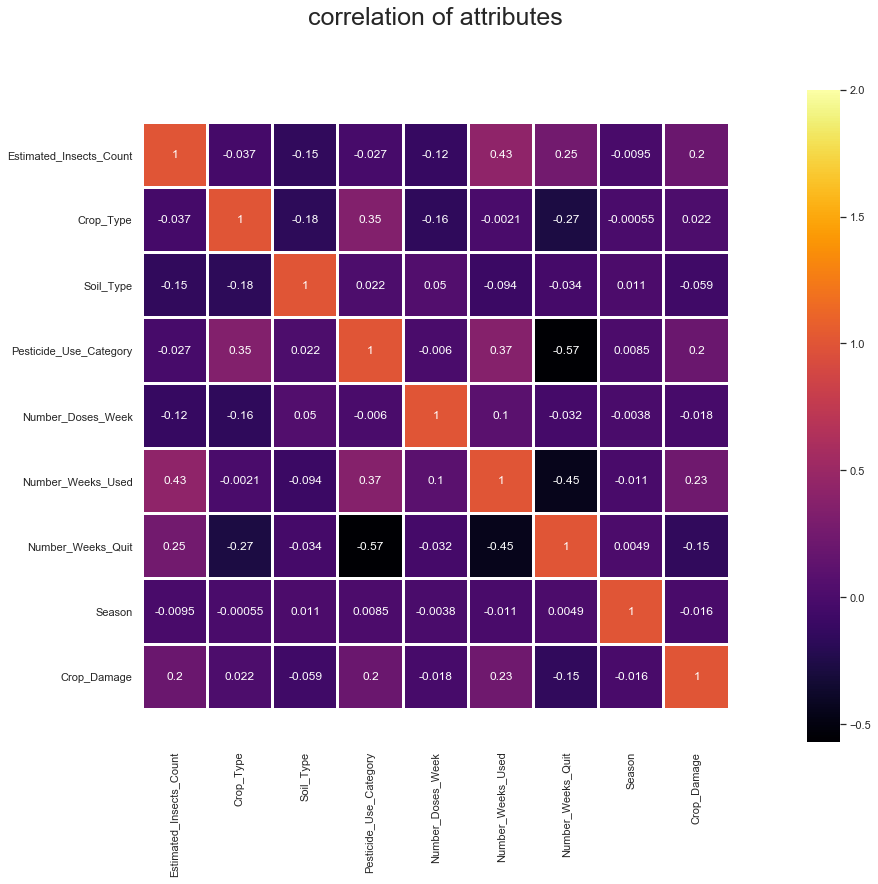

In [124]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(28,12))
plt.title('correlation of attributes',y=1.09, size=25)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for button and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

In [125]:
# Target column distribution
pd.value_counts(df['Crop_Damage'])

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

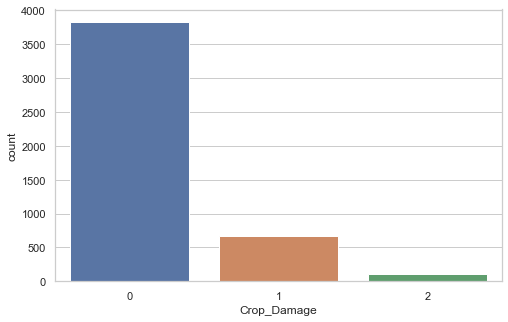

In [126]:
# Target column distribution plot
sns.set(style='whitegrid');plt.figure(figsize=(8,5))
sns.countplot(x='Crop_Damage',data=df)

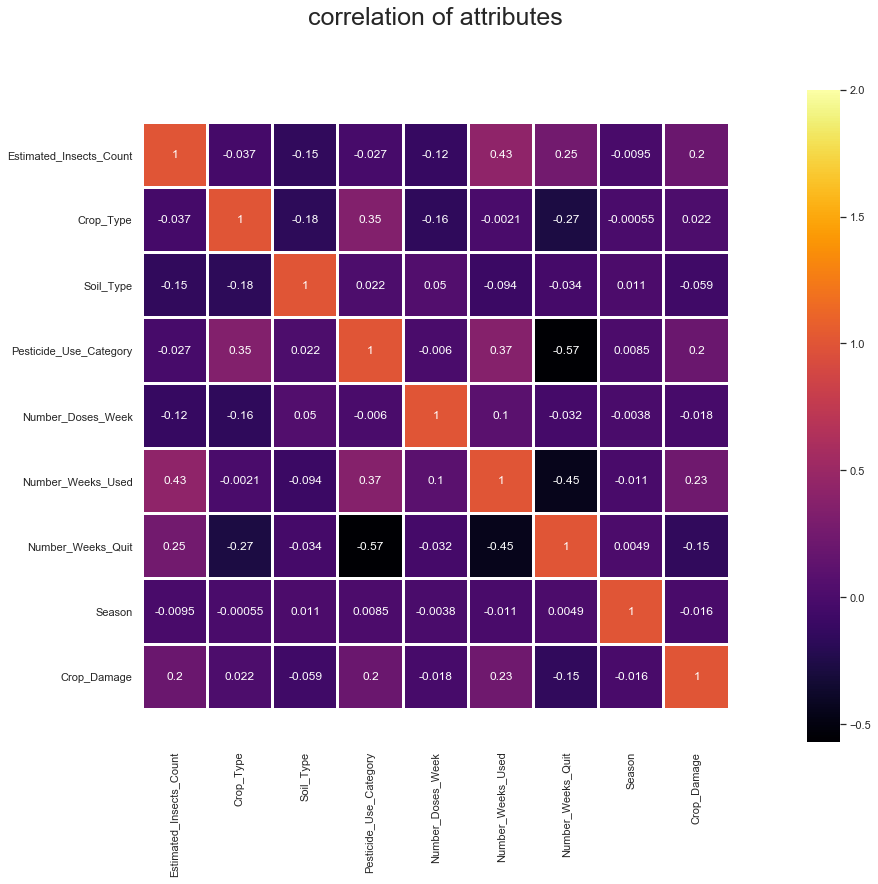

In [127]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(28,12))
plt.title('correlation of attributes',y=1.09, size=25)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for button and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

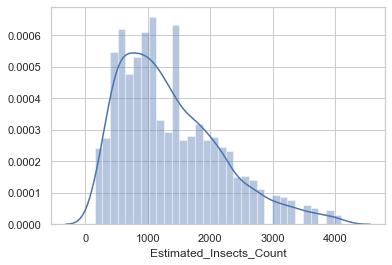

In [128]:
sns.distplot(df['Estimated_Insects_Count'])

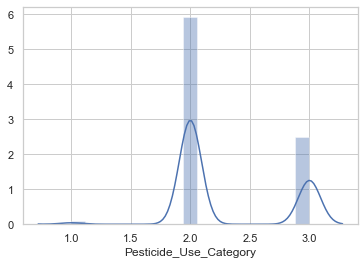

In [129]:
sns.distplot(df['Pesticide_Use_Category'])

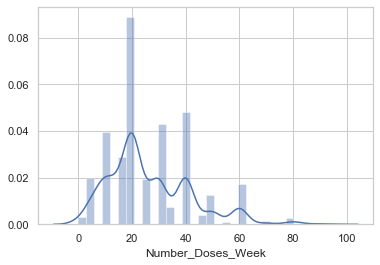

In [130]:
sns.distplot(df['Number_Doses_Week'])

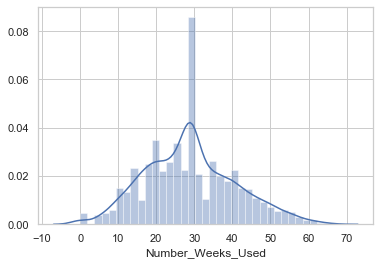

In [131]:
sns.distplot(df['Number_Weeks_Used'])

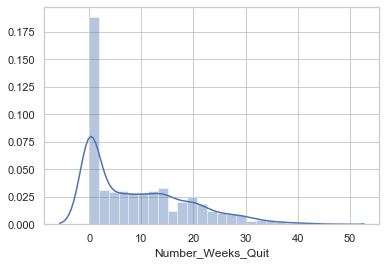

In [132]:
sns.distplot(df['Number_Weeks_Quit'])

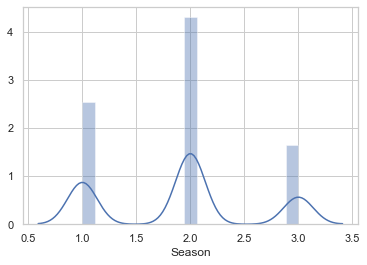

In [133]:
sns.distplot(df['Season'])

In [134]:
# Drop useless columns
df =df.drop(columns=['ID'])
df.head(2)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1


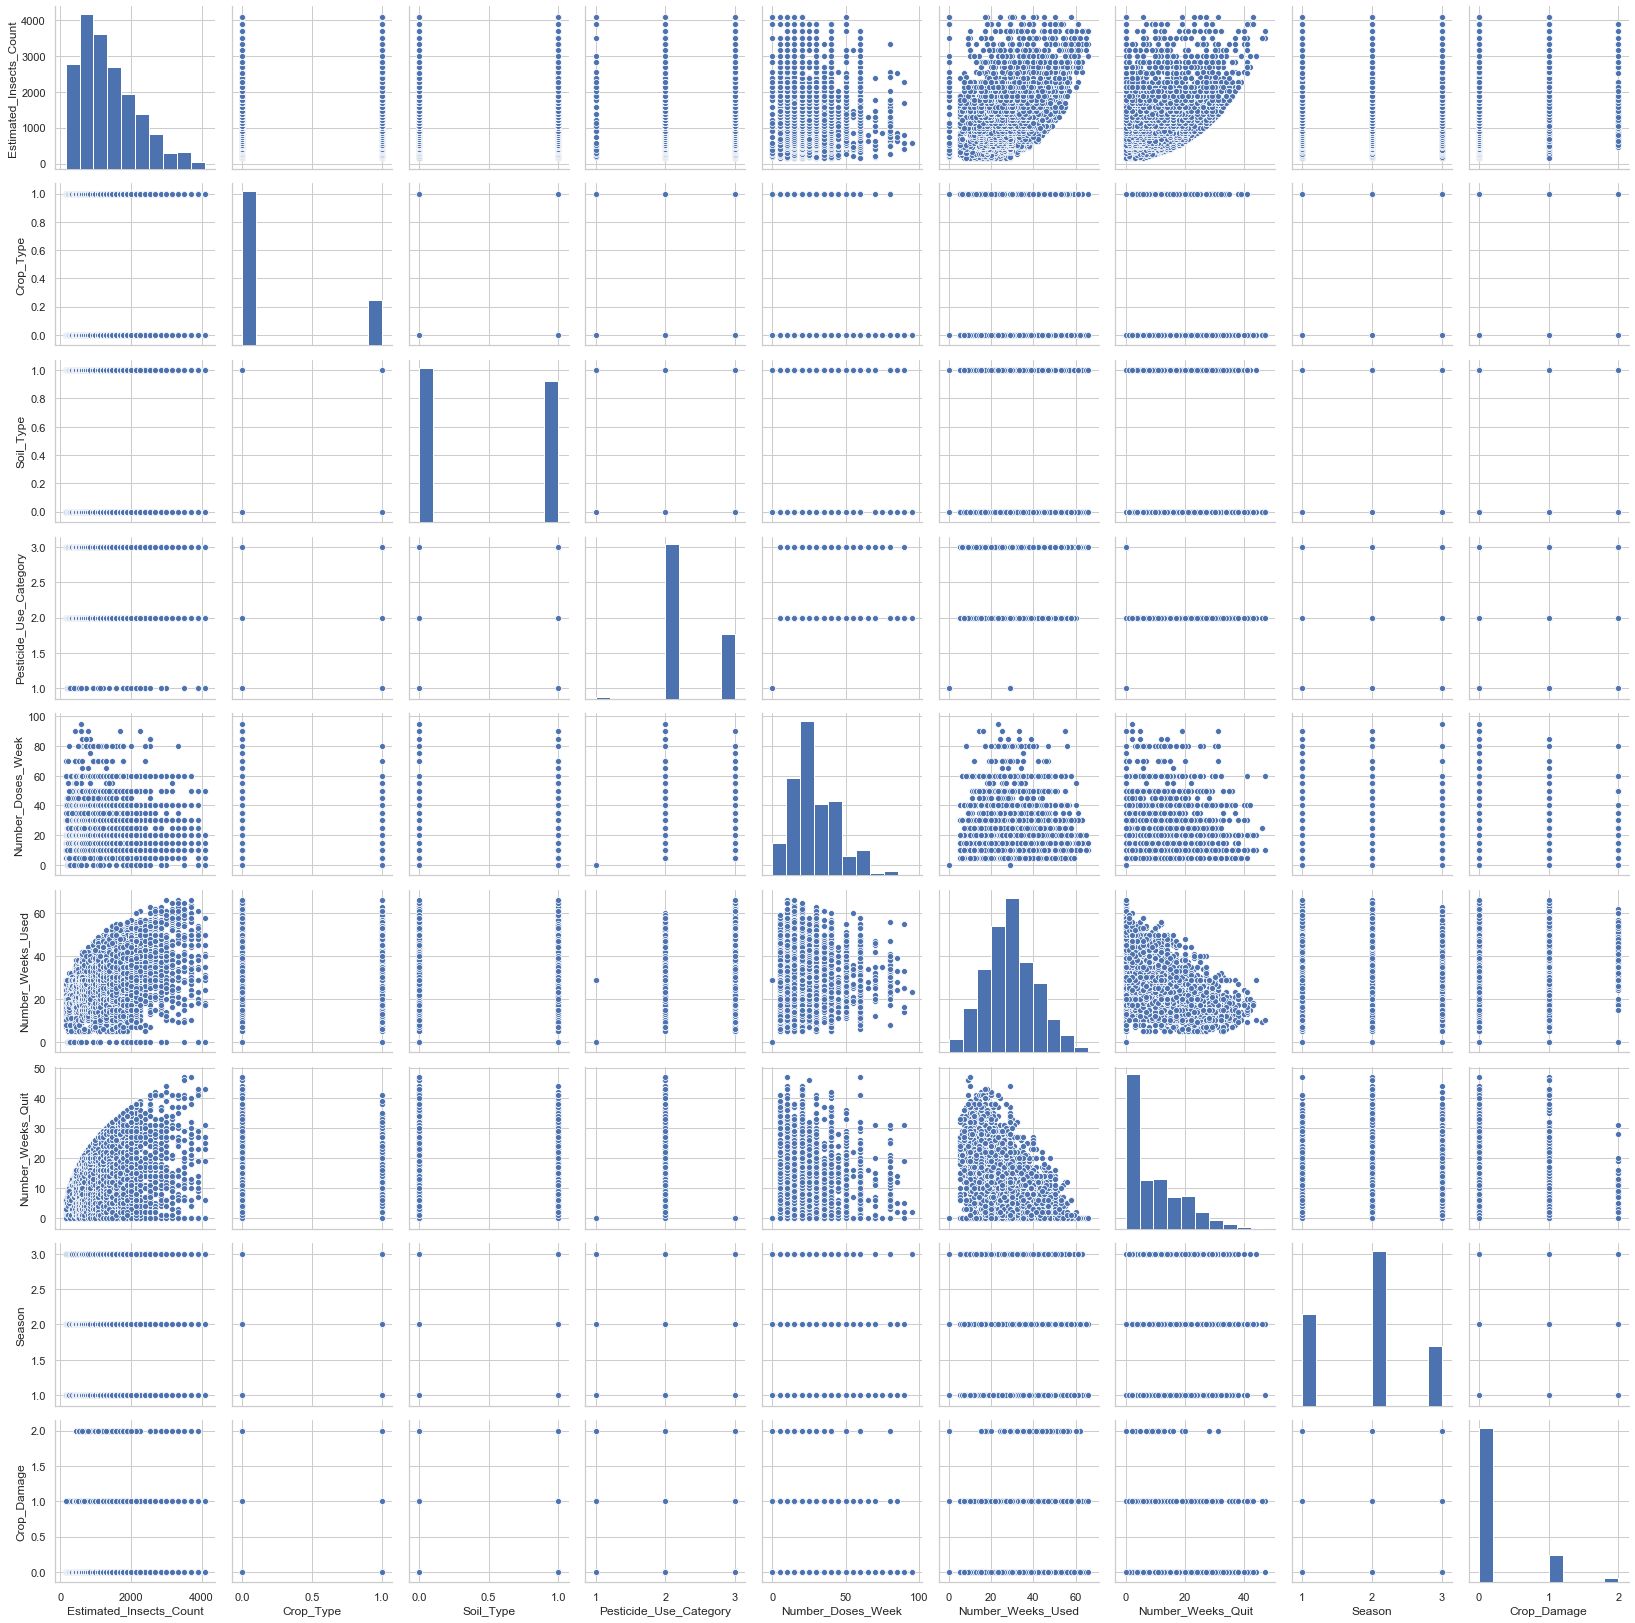

In [135]:
# Lets the check the Multi variant analysis of the Numerical Variables
import seaborn as sns
sns.pairplot(df)
plt.show()

In [136]:
# Lets check for Outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(4599, 9)
(4370, 9)


In [137]:
# Sepearting target and input variables
import numpy as np
x=df_final.drop(columns=['Crop_Damage'])
y=df_final[["Crop_Damage"]]

In [138]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)

In [139]:
#print the shape of the train and test data values

print(train_x.shape)

print(train_y.shape)

print(test_x.shape)

print(test_y.shape)

(3496, 8)
(3496, 1)
(874, 8)
(874, 1)


In [140]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
mnb.score(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.7288329519450801
[[583 179]
 [ 58  54]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       762
           1       0.23      0.48      0.31       112

    accuracy                           0.73       874
   macro avg       0.57      0.62      0.57       874
weighted avg       0.82      0.73      0.76       874



In [141]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8718535469107551
[[762   0]
 [112   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       762
           1       0.00      0.00      0.00       112

    accuracy                           0.87       874
   macro avg       0.44      0.50      0.47       874
weighted avg       0.76      0.87      0.81       874



In [142]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
predsvc=dtc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.7791762013729977
[[650 112]
 [ 81  31]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       762
           1       0.22      0.28      0.24       112

    accuracy                           0.78       874
   macro avg       0.55      0.56      0.56       874
weighted avg       0.80      0.78      0.79       874



In [143]:
svc=KNeighborsClassifier()
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8524027459954233
[[728  34]
 [ 95  17]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       762
           1       0.33      0.15      0.21       112

    accuracy                           0.85       874
   macro avg       0.61      0.55      0.56       874
weighted avg       0.81      0.85      0.83       874



In [144]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8718535469107551
[[762   0]
 [112   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       762
           1       0.00      0.00      0.00       112

    accuracy                           0.87       874
   macro avg       0.44      0.50      0.47       874
weighted avg       0.76      0.87      0.81       874



In [145]:
def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(train_x,train_y)
    svc.score(train_x,train_y)
    predsvc=svc.predict(test_x)
    print(accuracy_score(test_y,predsvc))
    print(confusion_matrix(test_y,predsvc))
    print(classification_report(test_y,predsvc))

In [146]:
svmkernel('rbf')

0.8718535469107551
[[762   0]
 [112   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       762
           1       0.00      0.00      0.00       112

    accuracy                           0.87       874
   macro avg       0.44      0.50      0.47       874
weighted avg       0.76      0.87      0.81       874



In [147]:
svmkernel('poly')

0.8718535469107551
[[762   0]
 [112   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       762
           1       0.00      0.00      0.00       112

    accuracy                           0.87       874
   macro avg       0.44      0.50      0.47       874
weighted avg       0.76      0.87      0.81       874



In [148]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_predicition.csv')

In [149]:
from sklearn.model_selection import cross_val_score
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.66819222 0.77688787 0.65331808 0.67734554 0.75629291]
0.7064073226544623
0.050158805038780375


In [150]:
sv=SVC()
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.66819222 0.77688787 0.65331808 0.67734554 0.75629291]
0.7064073226544623
0.050158805038780375


In [151]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9800000000000001
linear
{'C': 1, 'kernel': 'linear'}


In [152]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [153]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [154]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]


for m in model:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.7848970251716247
[[655 107]
 [ 81  31]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       762
           1       0.22      0.28      0.25       112

    accuracy                           0.78       874
   macro avg       0.56      0.57      0.56       874
weighted avg       0.80      0.78      0.79       874



Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=

In [155]:
import pickle
filename='pickledtcfile.pkl'
pickle.dump(dtc,open(filename,'wb'))
# Load the model from the disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,